   <img src="https://www.sccpre.cat/mypng/full/403-4035365_tec-logo-png-logo-tec-de-monterrey.png"
        width="100"  style="float: left; margin-right: 10px;" />
   <div>
     <h1>Regresión Lineal Simple Caso Práctico</h1>
     <h4>Rezago Educativo y Pobreza<br>Armando Valdés López<br>Septiembre 2019</h4>
   </div>

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

## 01.-Entendimiento del Negocio

## 02.- Entendimiento de los Datos

In [9]:
Base_de_Datos= pd.read_excel('Pobreza_y_Rezago.xlsx')
Datos=pd.DataFrame(Base_de_Datos)
Datos.head(7)

,por_per_re_ed,por_per_po
0,12.691790,30.531104
1,22.348949,67.111172
2,28.544189,61.360527
3,18.775631,52.800458
4,17.741560,45.338512
5,16.534401,46.958330
6,17.799999,56.136204


In [3]:
print("Descripción de los Datos")
print("Observaciones y Variables",Datos.shape)
summary = Datos.describe()
print(" ")
print("Resumen de Datos Cuantitativos")
print(summary)

Descripción de los Datos
Observaciones y Variables (2456, 2)
 
Resumen de Datos Cuantitativos
       por_per_re_ed   por_per_po
count    2456.000000  2456.000000
mean       29.950428    67.421505
std        10.030251    18.516378
min         3.996080     8.745311
25%        23.035885    55.622230
50%        30.687310    69.862685
75%        37.046447    82.551284
max        63.178291    97.350405


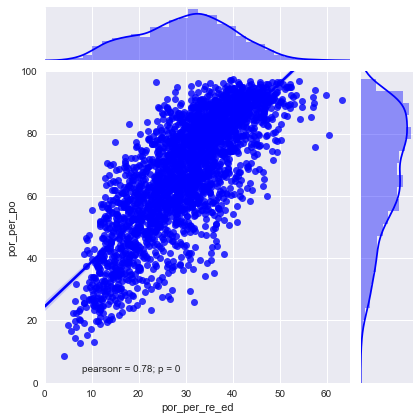

In [4]:
sns.set(style="darkgrid")
g = sns.jointplot("por_per_re_ed", "por_per_po", data=Datos,kind="reg",
                  xlim=(0,65) , ylim=(0, 100), color="b")

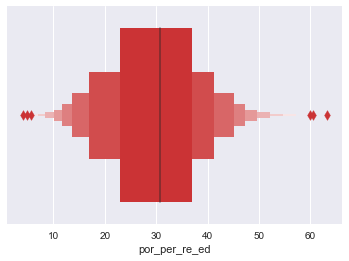

In [5]:
ax=sns.lvplot( x="por_per_re_ed",data=Datos, palette="Set1")
#ax =sns.stripplot(x="por_per_re_ed", data=Datos, size=4, jitter=True, color="gray")

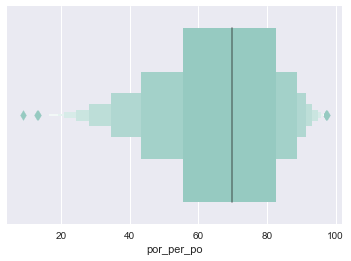

In [6]:
ax=sns.lvplot( x="por_per_po",data=Datos, palette="Set3")
#ax =sns.stripplot(x="por_per_po", data=Datos, size=4, jitter=True, color="gray")

## 03.-Preparación de los Datos

## 04.-Modelado

In [12]:
x=np.array(Datos.por_per_re_ed).reshape((-1,1))
y=np.array(Datos.por_per_po)

### a.- Modelo de Regresión Lineal

In [13]:
model1=LinearRegression()
model1.fit(x,y)
R_sq1=model1.score(x,y)
y_pred1=model1.predict(x)
ecm1=mean_squared_error(y,y_pred1)
rms1 = sqrt(mean_squared_error(y,y_pred1))

## 05.-Evaluación

### a'.- Evaluación Regresión Lineal

In [14]:
print("Intercepto a",model1.intercept_)
print("Pendiente b",model1.coef_)
print("Coeficiente de determinación",R_sq1)
print("Error cuadrático medio",ecm1)
print("Raiz del error cuadrático medio", rms1)
print("y = "+ str(model1.intercept_) + " + "+ str(model1.coef_) +"*"+"x" )

Intercepto a 24.5302868995
Pendiente b [ 1.43207364]
Coeficiente de determinación 0.601786245863
Error cuadrático medio 136.474482126
Raiz del error cuadrático medio 11.682229330298119
y = 24.5302868995 + [ 1.43207364]*x


In [16]:
from statsmodels.formula.api import ols
model = ols("por_per_po ~ por_per_re_ed", Datos).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:             por_per_po   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     3709.
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:14:07   Log-Likelihood:                -9521.9
No. Observations:                2456   AIC:                         1.905e+04
Df Residuals:                    2454   BIC:                         1.906e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        24.5303      0.743     33.026

## 06.-Implementación